Equal Width Discretisation

import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


import data

In [3]:
equal_width_data = pd.read_csv('/content/titanic_train.csv', usecols = ['Age', 'Fare', 'Survived'])
equal_width_data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


dividing the data as train and test

In [4]:

X_train, X_test, y_train, y_test = train_test_split(equal_width_data[['Age', 'Fare', 'Survived']], equal_width_data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

displaying the distribution of Age

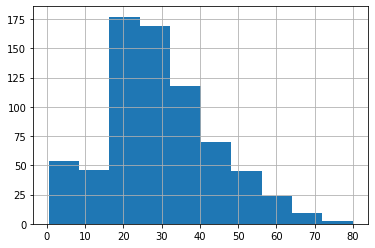

In [7]:
equal_width_data.Age.hist()

Relationship between Age and Survival

Text(0, 0.5, 'Survived')

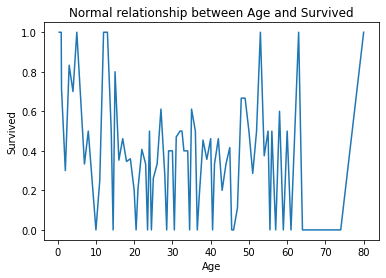

In [8]:
fig = plt.figure()
fig = equal_width_data.groupby(['Age'])['Survived'].mean().plot()
fig.set_title('Normal relationship between Age and Survived')
fig.set_ylabel('Survived')

Number of people per year vs survived

Text(0, 0.5, 'Survived')

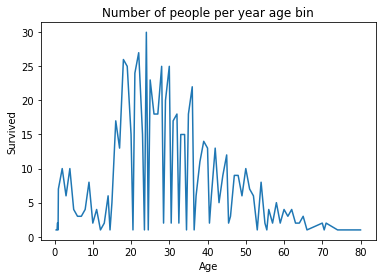

In [9]:
fig = plt.figure()
fig = equal_width_data.groupby(['Age'])['Survived'].count().plot()
fig.set_title('Number of people per year age bin')
fig.set_ylabel('Survived')

In [10]:
Age_range = X_train.Age.max() - X_train.Age.min()
Age_range

79.33

In [11]:
min_value = int(np.floor(X_train.Age.min()))
max_value = int(np.ceil(X_train.Age.max()))


inter_value = int(np.round(Age_range/10))

min_value, max_value, inter_value

(0, 80, 8)

In [12]:
intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
intervals

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]

grouping Age into bins, we can get a better view of the survival rate depending on the Age of the passenger

In [13]:
X_train['Age_disc'] = pd.cut(x = X_train.Age, bins=intervals, include_lowest=True)

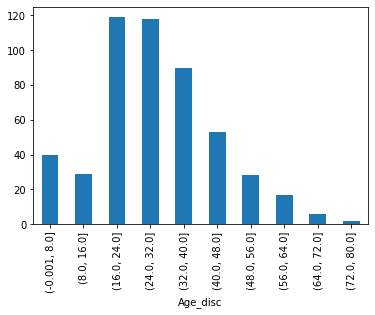

In [14]:
X_train.groupby('Age_disc')['Age'].count().plot.bar()

The majority of people on the Titanic were between 16-40 years of age.